In [17]:
%matplotlib inline
import talib as ta
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [18]:
class TALibOverlapStudies:
    
    def BollBands(self, close, period, nbdev=2, feature_dict={}):
        stddev = nbdev
        bollUPPER, bollMIDDLE, bollLOWER = ta.BBANDS(
            # Closing price, narray
            close,
            # time def 20
            timeperiod = period,
            # num of std deviations from mean
            nbdevup = stddev,
            nbdevdn = stddev,
            # Moving average type: 0-simple
            matype=0)
        feature_dict['BollBands_'+str(period)]='Keep'
        return bollUPPER, bollMIDDLE, bollLOWER, feature_dict
    
    def ExpMA(self, close, period, feature_dict):
        feature_dict['EMA_'+str(period)]='Keep'
        expMA = ta.EMA(
            close,
            # default is 30
            period)
        return expMA, feature_dict
    
    def SimpleMA(self, close, period, feature_dict):
        feature_dict['SMA_'+str(period)]='Keep'
        simpleMA = ta.SMA(
            close,
            # default is 30
            period)
        return simpleMA, feature_dict
    
    def WeightedMA(self, close, period, feature_dict):
        feature_dict['WMA_'+str(period)]='Keep'
        weightedMA = ta.WMA(
            close,
            # default is 30
            period)
        return weightedMA, feature_dict
    
    def TripleEMA(self, close, period, feature_dict):
        feature_dict['TMA_'+str(period)]='Keep'
        tripleEMA = ta.TEMA(
            close,
            # default is 30
            period)
        return tripleEMA, feature_dict
    
    def TriangularMA(self, close, period, feature_dict):
        feature_dict['TMA_'+str(period)]='Keep'
        triangularMA = ta.TRIMA(
            close,
            # default is 30
            period)
        return triangularMA, feature_dict
    
    def DblEMA(self, close, period, feature_dict):
        feature_dict['DEMA_'+str(period)]='Keep'
        dblEMA = ta.DEMA(
            close,
            # default is 30
            period)
        return dblEMA, feature_dict

    def KaufmanAMA(self, close, period, feature_dict):
        feature_dict['KAMA_'+str(period)]='Keep'
        kaufmanAMA = ta.KAMA(
            close,
            # default is 30
            period)
        return kaufmanAMA, feature_dict
    
    def MesaAMA(self, close, fastlimit, slowlimit, feature_dict):
        feature_dict['MesaAMA_f'+str(fastlimit)+'_s'+str(slowlimit)]='Keep'
        mama, fama = ta.MAMA(
            close,
            # defaults are 0
            # The FastLimit and SlowLimit parameters should be between 0.01 and 0.99
            fastlimit,
            slowlimit)
        return mama, fama, feature_dict
    
    def HilbertTransform(self, close, feature_dict):
        feature_dict['HTTrendline']='Keep'
        HTTrendline = ta.HT_TRENDLINE(close)
        return HTTrendline, feature_dict
    
    def MidPoint(self, close, period, feature_dict):
        feature_dict['Midpoint_'+str(period)]='Keep'
        midPoint = ta.MIDPOINT(
            close,
            # default is 30
            period)
        return midPoint, feature_dict
    
    def MidPrice(self, high, low, period, feature_dict):
        feature_dict['Midprice_'+str(period)]='Keep'
        midPrice = ta.MIDPRICE(
            high,
            low,
            # default is 30
            period)
        return midPrice, feature_dict

    def PSAR(self, high, low, period, feature_dict):
        feature_dict['PSAR_'+str(period)]='Keep'
        pSAR = ta.SAR(
            high,
            low,
            # default is 30
            period)
        return pSAR, feature_dict
    
    def ELI(self, close, feature_dict, n=14):
        feature_dict['EhlersLI_'+str(n)]='Keep'
        a = n / 4.0
        _EMA1 = pd.ewma(close, span=a)

        a = n / 2.0
        _EMA2 = pd.ewma(close, span=a)

        syn = _EMA1 - _EMA2
        _EMAsyn = pd.ewma(syn, span=a)
        _ELI = syn - _EMAsyn

        return _ELI, feature_dict

In [19]:
import sys
sys.path.append('./lib')
sys.path.append('./utilities')
from plot_utils import *
from retrieve_data import *
dataLoadStartDate = "2014-04-01"
dataLoadEndDate = "2018-04-01"
issue = "TLT"
feature_dict = {}

taLibOS = TALibOverlapStudies()
    
dSet = DataRetrieve()
dataSet = dSet.read_issue_data(issue)
    
dataSet = dSet.set_date_range(dataSet, dataLoadStartDate,dataLoadEndDate)

Successfully retrieved data series for TLT


In [12]:
dataSet['BB-UB'],dataSet['BB-MB'],dataSet['BB-LB'], feature_dict = taLibOS.BollBands(dataSet.Pri.values, 20, 2, feature_dict)
dataSet['DEMA_20'], feature_dict = taLibOS.DblEMA(dataSet.Pri.values, 20, feature_dict)
dataSet['KAMA_20'], feature_dict = taLibOS.KaufmanAMA(dataSet.Pri.values, 20, feature_dict)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


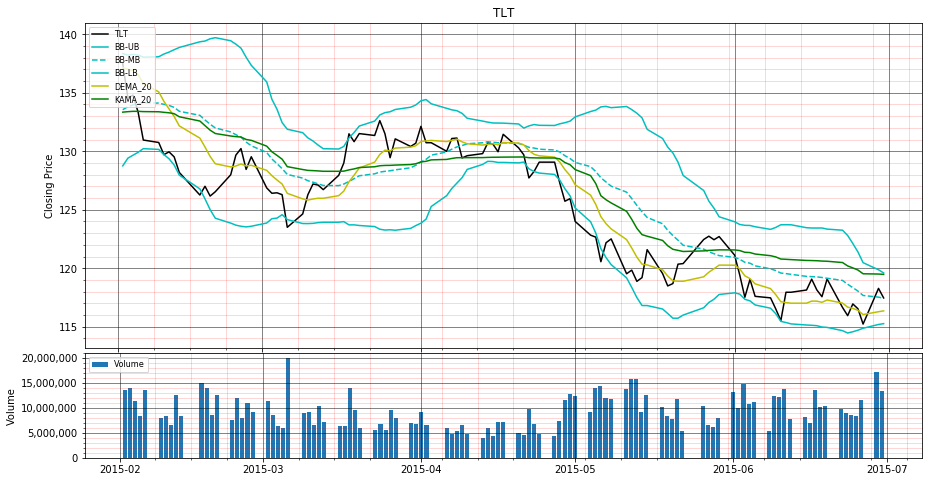

In [13]:
startDate = "2015-02-01"
endDate = "2015-06-30"
rsiDataSet = dataSet.ix[startDate:endDate]
plt.figure(figsize=(15,8))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
#top.plot(rsiDataSet.index, rsiDataSet['Pri']) #
#bottom.bar(rsiDataSet.index, rsiDataSet['Volume'])
top.plot(rsiDataSet.index, rsiDataSet['Pri'], 'k-', markersize=3,label=issue)
top.plot(rsiDataSet.index, rsiDataSet['BB-UB'], 'c-')
top.plot(rsiDataSet.index, rsiDataSet['BB-MB'], 'c--')
top.plot(rsiDataSet.index, rsiDataSet['BB-LB'], 'c-')
top.plot(rsiDataSet.index, rsiDataSet['DEMA_20'], 'y-')
top.plot(rsiDataSet.index, rsiDataSet['KAMA_20'], 'g-')
bottom.bar(rsiDataSet.index, rsiDataSet['Volume'], label='Volume');
plt.subplots_adjust(hspace=0.05)
# set the labels
top.axes.get_xaxis().set_visible(True)
top.set_title('TLT')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

for ax in top, bottom:
                ax.label_outer()
                ax.legend(loc='upper left', frameon=True, fontsize=8)
                ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                ax.grid(True, which='both')
                ax.xaxis_date()
                ax.autoscale_view()
                ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.6)
                ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                ax.minorticks_on()

In [21]:
dataSet['MesaAMA_Fast'], dataSet['MesaAMA_Slow'], feature_dict = taLibOS.MesaAMA(dataSet.Pri.values, 0.9, 0.1, feature_dict)
dataSet['EMA_30'], feature_dict = taLibOS.ExpMA(dataSet.Pri.values, 30, feature_dict)
dataSet['HT_Trendline'], feature_dict = taLibOS.HilbertTransform(dataSet.Pri.values, feature_dict)
dataSet['HT_ELI_14'], feature_dict = taLibOS.ELI(dataSet.Pri.values, feature_dict, 14)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version


In [25]:
print(dataSet.HT_ELI_14)

2014-04-01    0.000000
2014-04-02   -0.018980
2014-04-03    0.014768
2014-04-04    0.075702
2014-04-07    0.129929
2014-04-08    0.132116
2014-04-09    0.025512
2014-04-10    0.099440
2014-04-11    0.196407
2014-04-14    0.119009
2014-04-15    0.135497
2014-04-16    0.098582
2014-04-17   -0.139647
2014-04-18   -0.210315
2014-04-21   -0.219721
2014-04-22   -0.135875
2014-04-23   -0.000800
2014-04-24    0.058836
2014-04-25    0.072447
2014-04-28   -0.034966
2014-04-29   -0.098000
2014-04-30   -0.041321
2014-05-01    0.107884
2014-05-02    0.215372
2014-05-05    0.079698
2014-05-06    0.061547
2014-05-07   -0.041294
2014-05-08   -0.157552
2014-05-09   -0.229496
2014-05-12   -0.277857
                ...   
2018-02-16    0.259205
2018-02-20    0.204485
2018-02-21   -0.035761
2018-02-22   -0.015433
2018-02-23    0.182718
2018-02-26    0.240122
2018-02-27    0.203091
2018-02-28    0.273561
2018-03-01    0.327627
2018-03-02    0.130493
2018-03-05   -0.008799
2018-03-06   -0.035140
2018-03-07 

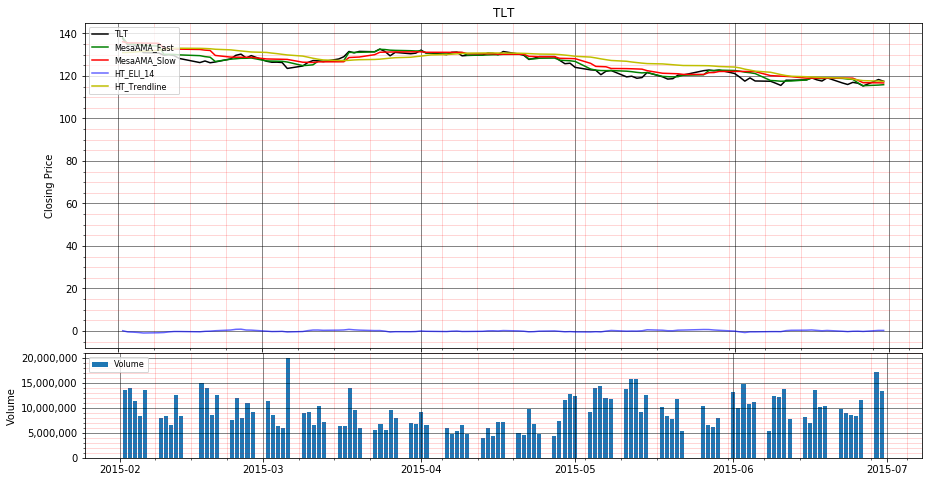

In [24]:
startDate = "2015-02-01"
endDate = "2015-06-30"
rsiDataSet = dataSet.ix[startDate:endDate]
plt.figure(figsize=(15,8))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
#top.plot(rsiDataSet.index, rsiDataSet['Pri']) #
#bottom.bar(rsiDataSet.index, rsiDataSet['Volume'])
top.plot(rsiDataSet.index, rsiDataSet['Pri'], 'k-', markersize=3,label=issue)
top.plot(rsiDataSet.index, rsiDataSet['MesaAMA_Fast'], 'g-')
top.plot(rsiDataSet.index, rsiDataSet['MesaAMA_Slow'], 'r-')
top.plot(rsiDataSet.index, rsiDataSet['HT_ELI_14'], 'b--', alpha=0.6)
top.plot(rsiDataSet.index, rsiDataSet['HT_Trendline'], 'y-')
bottom.bar(rsiDataSet.index, rsiDataSet['Volume'], label='Volume');
plt.subplots_adjust(hspace=0.05)
# set the labels
top.axes.get_xaxis().set_visible(True)
top.set_title('TLT')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

for ax in top, bottom:
                ax.label_outer()
                ax.legend(loc='upper left', frameon=True, fontsize=8)
                ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                ax.grid(True, which='both')
                ax.xaxis_date()
                ax.autoscale_view()
                ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.6)
                ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                ax.minorticks_on()

In [144]:
dataSet['Midpoint_30'], feature_dict = taLibOS.MidPoint(dataSet.Pri.values, 30, feature_dict)
dataSet['Midprice_30'], feature_dict = taLibOS.MidPrice(dataSet.High.values, dataSet.Low.values, 30, feature_dict)
dataSet['PSAR'], feature_dict = taLibOS.PSAR(dataSet.High.values, dataSet.Low.values, 30, feature_dict)
dataSet['SMA_30'], feature_dict = taLibOS.SimpleMA(dataSet.Pri.values, 30, feature_dict)
dataSet['TEMA_30'], feature_dict = taLibOS.TripleEMA(dataSet.Pri.values, 30, feature_dict)
dataSet['TRIMA_30'], feature_dict = taLibOS.TriangularMA(dataSet.Pri.values, 30, feature_dict)
dataSet['WMA_30'], feature_dict = taLibOS.WeightedMA(dataSet.Pri.values, 30, feature_dict)

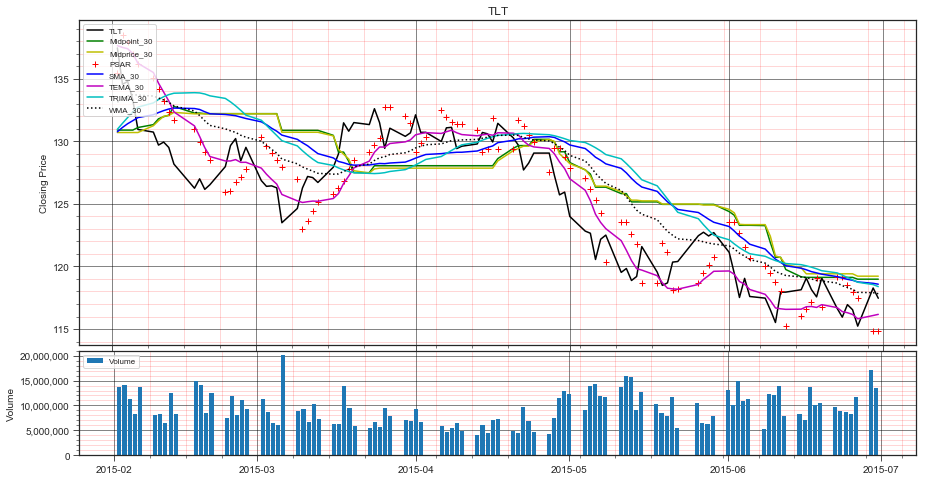

In [146]:
startDate = "2015-02-01"
endDate = "2015-06-30"
rsiDataSet = dataSet.ix[startDate:endDate]
plt.figure(figsize=(15,8))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
#top.plot(rsiDataSet.index, rsiDataSet['Pri']) #
#bottom.bar(rsiDataSet.index, rsiDataSet['Volume'])
top.plot(rsiDataSet.index, rsiDataSet['Pri'], 'k-', markersize=3,label=issue)
top.plot(rsiDataSet.index, rsiDataSet['Midpoint_30'], 'g-')
top.plot(rsiDataSet.index, rsiDataSet['Midprice_30'], 'y-')
top.plot(rsiDataSet.index, rsiDataSet['PSAR'], 'r+')
top.plot(rsiDataSet.index, rsiDataSet['SMA_30'], 'b-')
top.plot(rsiDataSet.index, rsiDataSet['TEMA_30'], 'm-')
top.plot(rsiDataSet.index, rsiDataSet['TRIMA_30'], 'c-')
top.plot(rsiDataSet.index, rsiDataSet['WMA_30'], 'k:')
bottom.bar(rsiDataSet.index, rsiDataSet['Volume'], label='Volume');
plt.subplots_adjust(hspace=0.05)
# set the labels
top.axes.get_xaxis().set_visible(True)
top.set_title('TLT')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

for ax in top, bottom:
                ax.label_outer()
                ax.legend(loc='upper left', frameon=True, fontsize=8)
                ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                ax.grid(True, which='both')
                ax.xaxis_date()
                ax.autoscale_view()
                ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.6)
                ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                ax.minorticks_on()